In [ ]:
* 1.Rating Groups instances in dataset
2.distrebution of ratings based on:* 1.cat egory
                                   * 2.brand
                                    3.price
*3.fabric word instences coresponding to rating
*4.size word instences coresponding to rating (dot size)
*5.color word instences coresponding to rating (dot color)

6.size and color on ratings disterbution

*7.pircen curr

8.heat map, scatter plot, line plot, pie plot

In [20]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [109]:
dfS=pd.read_csv("shopbop_cleaning_final_final_table.csv")
dfV=pd.read_csv("avenue_cleaning_final_table.csv")

In [110]:
df = dfS.append(dfV, ignore_index=True)

C:\Users\linoy\AppData\Local\Temp\ipykernel_43168\3272966158.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfS.append(dfV, ignore_index=True)


In [111]:
df.to_csv("finale_df.csv")

Text(0.5, 0, 'Group Numbers (0-5)')

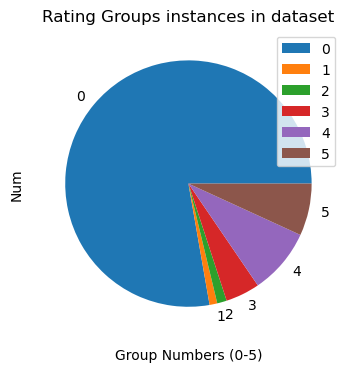

In [44]:
Rating_groups_df = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Num"])
for i in range(0,6):
    Rating_groups_df["Num"][i] = 0
    
for ind in df.index:
    Rating_groups_df["Num"][df["ratings"][ind]] = Rating_groups_df["Num"][df["ratings"][ind]] + 1
    
Rating_groups_df
fig, ax = plt.subplots(figsize=(5,4))
ax = Rating_groups_df.plot(kind='pie',y="Num",ax=ax)
ax.set_title("Rating Groups instances in dataset")
ax.set_xlabel("Group Numbers (0-5)")

הסבר על התרשים\מסקנות:
ניתן לראות מההתפלגות שרוב הפריטים אינם מדורגיםת דבר אשר ציפינו לו כיוון שבאתרים קטנים ללא דחיפה או עזרה חיצונית בדירוג שיקרי של הפריטיםת אנשים יכולים לדרג רק פריטים אשר הם קנו באמצמםת והקונים מדרגים רק על סמך חוויה אישית ולא בניסיון להרויח נקודות הדוחפות לדירוג מסיבי.
בנוסף באתרים קטנים יותר וביוחוד בותיקים מהסוג בו בחרנות קיימת התחדשות מהירה של הוספת פריטים חדשים והורדת הישנים כך שהפריטים הישנים בעלי הדירוג הגבוהה יורדים מהר יותר והחדשים שעוד לא הספיקו לקבל דירוג תופסים מקום משמעותי יותר.

בגרף העוגהת ניתן לראות כי דירוג 5 ו4 משמעותית גדול יותר משאר דירוגיםת דבר אשר מניתן להסביר בכך שאנשים שמדרגים ללא מתן תמורה עבור הדירוג עצמות ככה שרוב הקונים יחזרו לדרג בסבירות גבוהה יותר כאשר אהבו באמת את הפריט ולא להפך כלומר במידה ואהבו פחות את הפריט רוב הסיכויים שלא יחזרו לדרג אותו כללץ

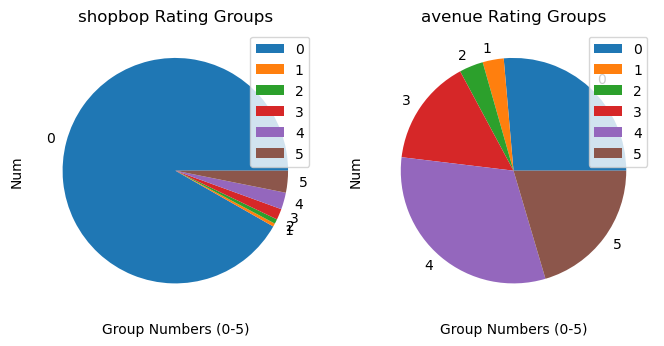

In [30]:
Rating_groups_dfS = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Num"])
Rating_groups_dfV = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Num"])
for i in range(0,6):
    Rating_groups_dfS["Num"][i] = 0
    Rating_groups_dfV["Num"][i] = 0
    
for ind in df.index:
    if df["brand"][ind]=="shopbop":
        Rating_groups_dfS["Num"][df["ratings"][ind]] = Rating_groups_dfS["Num"][df["ratings"][ind]] + 1
    else:
        Rating_groups_dfV["Num"][df["ratings"][ind]] = Rating_groups_dfV["Num"][df["ratings"][ind]] + 1
    
fig = plt.figure(figsize=(8,5))

ax1=fig.add_subplot(1,2,1)
ax1 = Rating_groups_dfS.plot(kind='pie',y="Num",ax=ax1)
ax1.set_title("shopbop Rating Groups")
ax1.set_xlabel("Group Numbers (0-5)")

ax2=fig.add_subplot(1,2,2)
ax2 = Rating_groups_dfV.plot(kind='pie',y="Num",ax=ax2)
ax2.set_title("avenue Rating Groups")
ax2.set_xlabel("Group Numbers (0-5)")


plt.show()

In [112]:
normalized_categorys=[]

for row in df.category:
    if row=='Dresses': normalized_categorys.append(1)
    if row=='Jackets_Coats': normalized_categorys.append(2)    
    if row=='Jumpsuits_Rompers': normalized_categorys.append(3)
    if row=='Lingerie': normalized_categorys.append(4)    
    if row=='Maternity': normalized_categorys.append(5)    
    if row=='Pants': normalized_categorys.append(6)    
    if row=='Skirts': normalized_categorys.append(7)  
    if row=='Sleepwear': normalized_categorys.append(8)   
    if row=='Sweaters_Knits': normalized_categorys.append(9)    
    if row=='Swimsuits_Cover_Ups': normalized_categorys.append(10)    
    if row=='Tops': normalized_categorys.append(11)

# normalized_categorys

In [113]:
category_dict={1:'Dresses', 2:'Jackets_Coats', 3:'Jumpsuits_Rompers', 4:'Lingerie', 5:'Maternity', 6:'Pants',
              7:'Skirts', 8:'Sleepwear', 9:'Sweaters_Knits', 10:'Swimsuits_Cover_Ups', 11:'Tops'}
df["category"]=normalized_categorys
df.to_csv("finale_df.csv")

Text(0.5, 0, 'Group Numbers (1-12)')

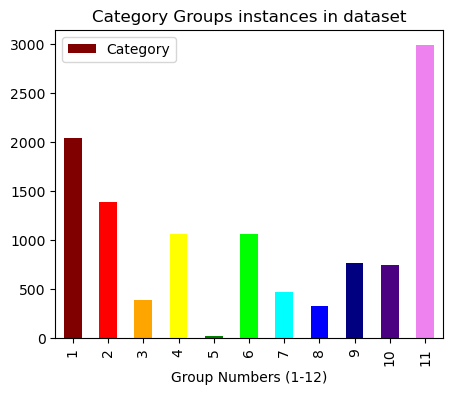

In [114]:
Category_groups_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11], columns=["Category"])
for i in range(1,12):
    Category_groups_df["Category"][i] = 0
    
for ind in df.index:
    Category_groups_df["Category"][normalized_categorys[ind]] = Category_groups_df["Category"][normalized_categorys[ind]] + 1
    
color_map=['maroon','red','orange','yellow', 'green','lime','aqua', 'blue','navy', 'indigo', 'violet']
    
fig, ax = plt.subplots(figsize=(5,4))
ax = Category_groups_df.plot(kind='bar',y="Category",ax=ax, color=color_map)
ax.set_title("Category Groups instances in dataset")
ax.set_xlabel("Group Numbers (1-12)")

In [115]:
index = list(category_dict.keys())
val = list(category_dict.values())

category_indx=pd.DataFrame({"index":index,"category":val})
category_indx

,index,category
0,1,Dresses
1,2,Jackets_Coats
2,3,Jumpsuits_Rompers
3,4,Lingerie
4,5,Maternity
5,6,Pants
6,7,Skirts
7,8,Sleepwear
8,9,Sweaters_Knits
9,10,Swimsuits_Cover_Ups


<AxesSubplot:xlabel='ratings'>

<Figure size 1000x2000 with 0 Axes>

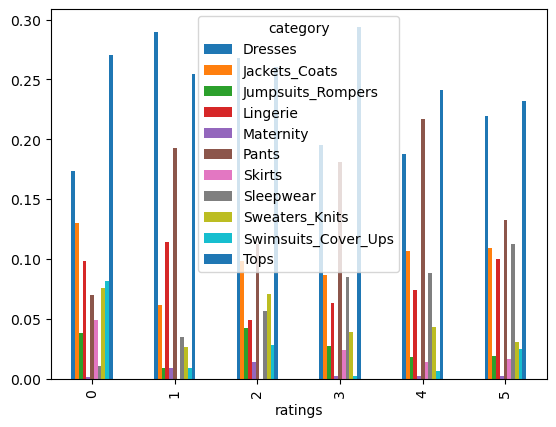

In [71]:
fig = plt.figure(figsize=(10,20))

ct1=pd.crosstab(df['ratings'], df['category'], normalize="index")
ct1.plot(kind='bar')


<AxesSubplot:>

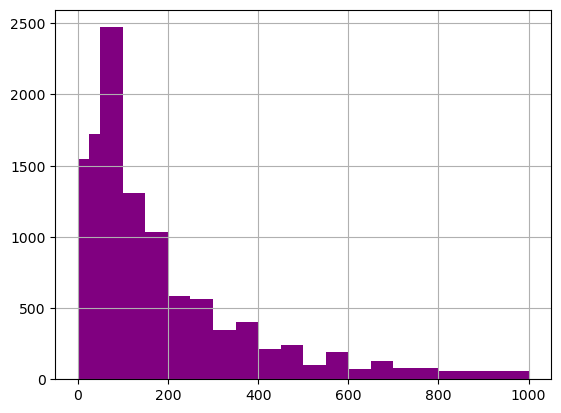

In [20]:
df.prices.hist(bins=[0, 25, 50, 100,150, 200,250, 300, 350, 400,450, 500,550, 600,650,700,800,900,1000], color='purple')

In [ ]:
# df

Text(0.5, 1.0, 'price by clothing rating')

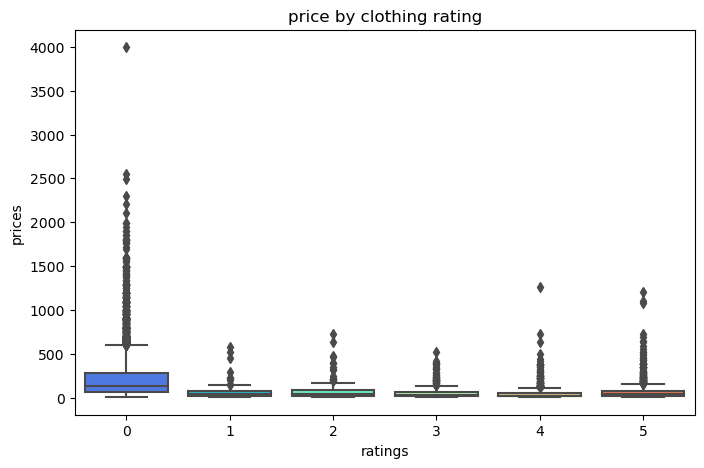

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(x='ratings',y='prices',data=df, palette='rainbow')
plt.title("price by clothing rating")

Text(0.5, 1.0, 'Violin Plot of price by clothing rating')

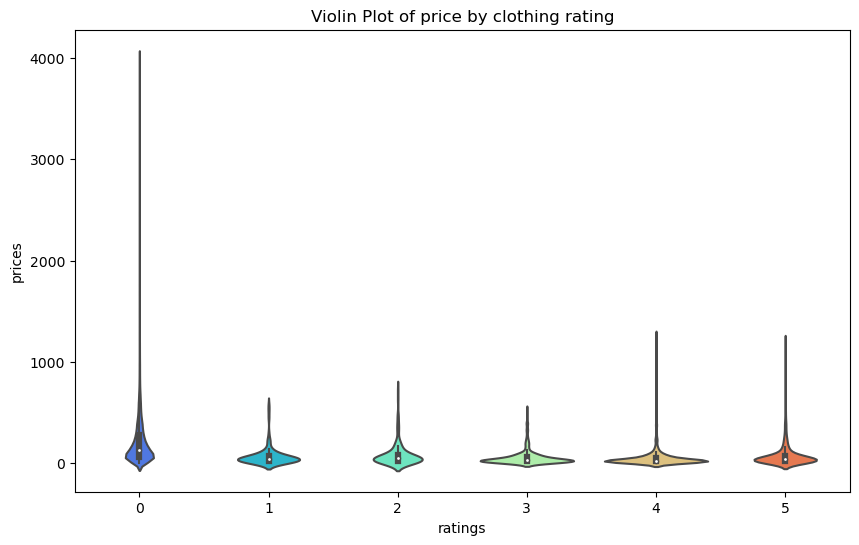

In [122]:
#https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

plt.figure(figsize=(10,6))
sns.violinplot(x='ratings',y='prices',data=df, palette='rainbow')
plt.title("Violin Plot of price by clothing rating")

In [ ]:
#size to rating:

In [125]:
df=pd.read_csv("finale_normalized_df.csv")
df

,brand,ratings,category,XXS,XS,S,P,M,L,XL,...,nylon,polyester,poplin,satin,stretch,viscose,weave,norm_prices,total_size_options,total_color_options
0,1,0,11,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0.121400,3,1
1,1,0,7,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0.153987,3,1
2,1,0,11,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0.062492,3,1
3,1,0,6,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0.117640,3,1
4,1,0,2,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0.399143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,2,3,10,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0.004587,6,1
11265,2,5,6,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.001075,3,1
11266,2,3,6,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0.000827,6,1
11267,2,3,6,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0.003582,6,1


<AxesSubplot:xlabel='ratings', ylabel='Count'>

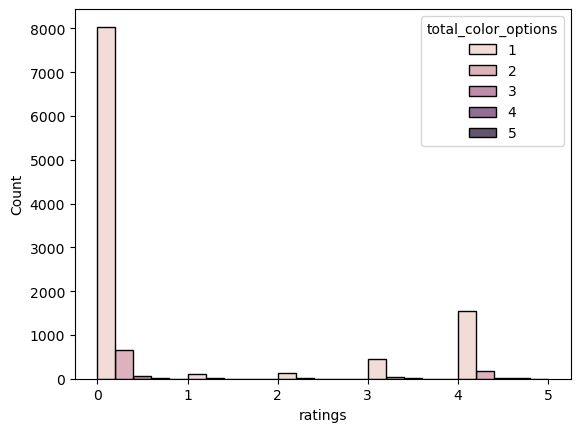

In [129]:
first_dimension = df["ratings"]
horizontal_label = df["total_size_options"]
second_dimension = df["total_color_options"]

sns.histplot(binwidth=1,
            x=first_dimension,
            hue=second_dimension,
            data=df,
            stat="count",
            multiple="dodge")

In [107]:
sizes_groups_df = pd.DataFrame(index=[0,1,2,3,4,5,6,7,8,9,10,11,12], columns=["Num"])
for i in range(0,13):
    sizes_groups_df["Num"][i] = 0 

size_names=["XXS","XS","S","P","M","L","XL","XXL","XXXL","XXXXL","One_size","5XL","6XL"]      

    
for ind in df.index:
    for i,name in  enumerate(size_names):
        if(df[name][ind]==1):
            sizes_groups_df["Num"][i] = sizes_groups_df["Num"][i] + 1

sizes_groups_df            
            
# fig, ax = plt.subplots(figsize=(5,4))
# ax = sizes_groups_df.plot(kind='pie',y="Num",ax=ax)
# ax.set_title("Rating Groups instances in dataset")
# ax.set_xlabel("Group Numbers (0-5)")

,Num
0,0
1,2173
2,8667
3,154
4,8095
5,9029
6,2387
7,2384
8,1430
9,1373


Text(0.5, 1.0, 'Rating corr to sizes')

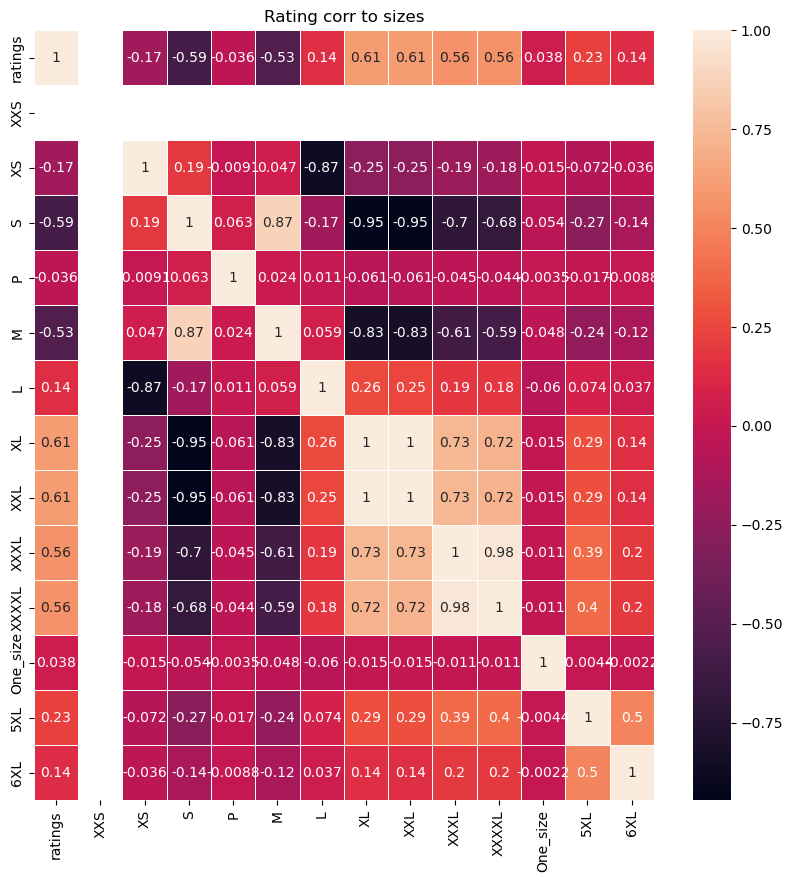

In [14]:
dataset_df1 = pd.DataFrame(df, columns =['ratings',"XXS","XS","S","P","M","L","XL","XXL","XXXL","XXXXL","One_size","5XL","6XL"])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Rating corr to sizes")

Text(0.5, 1.0, 'Rating corr to colors')

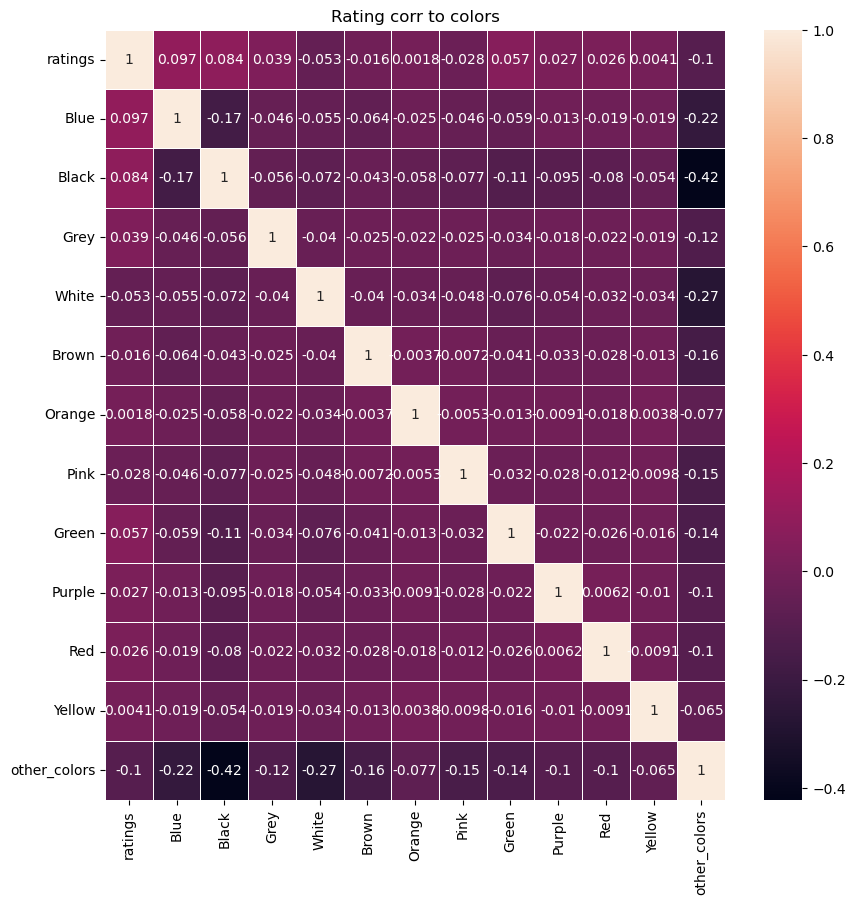

In [15]:
dataset_df1 = pd.DataFrame(df, columns =['ratings',"Blue",'Black',"Grey",'White','Brown','Orange','Pink','Green','Purple','Red','Yellow','other_colors'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Rating corr to colors")

Text(0.5, 1.0, 'Rating corr to fabric')

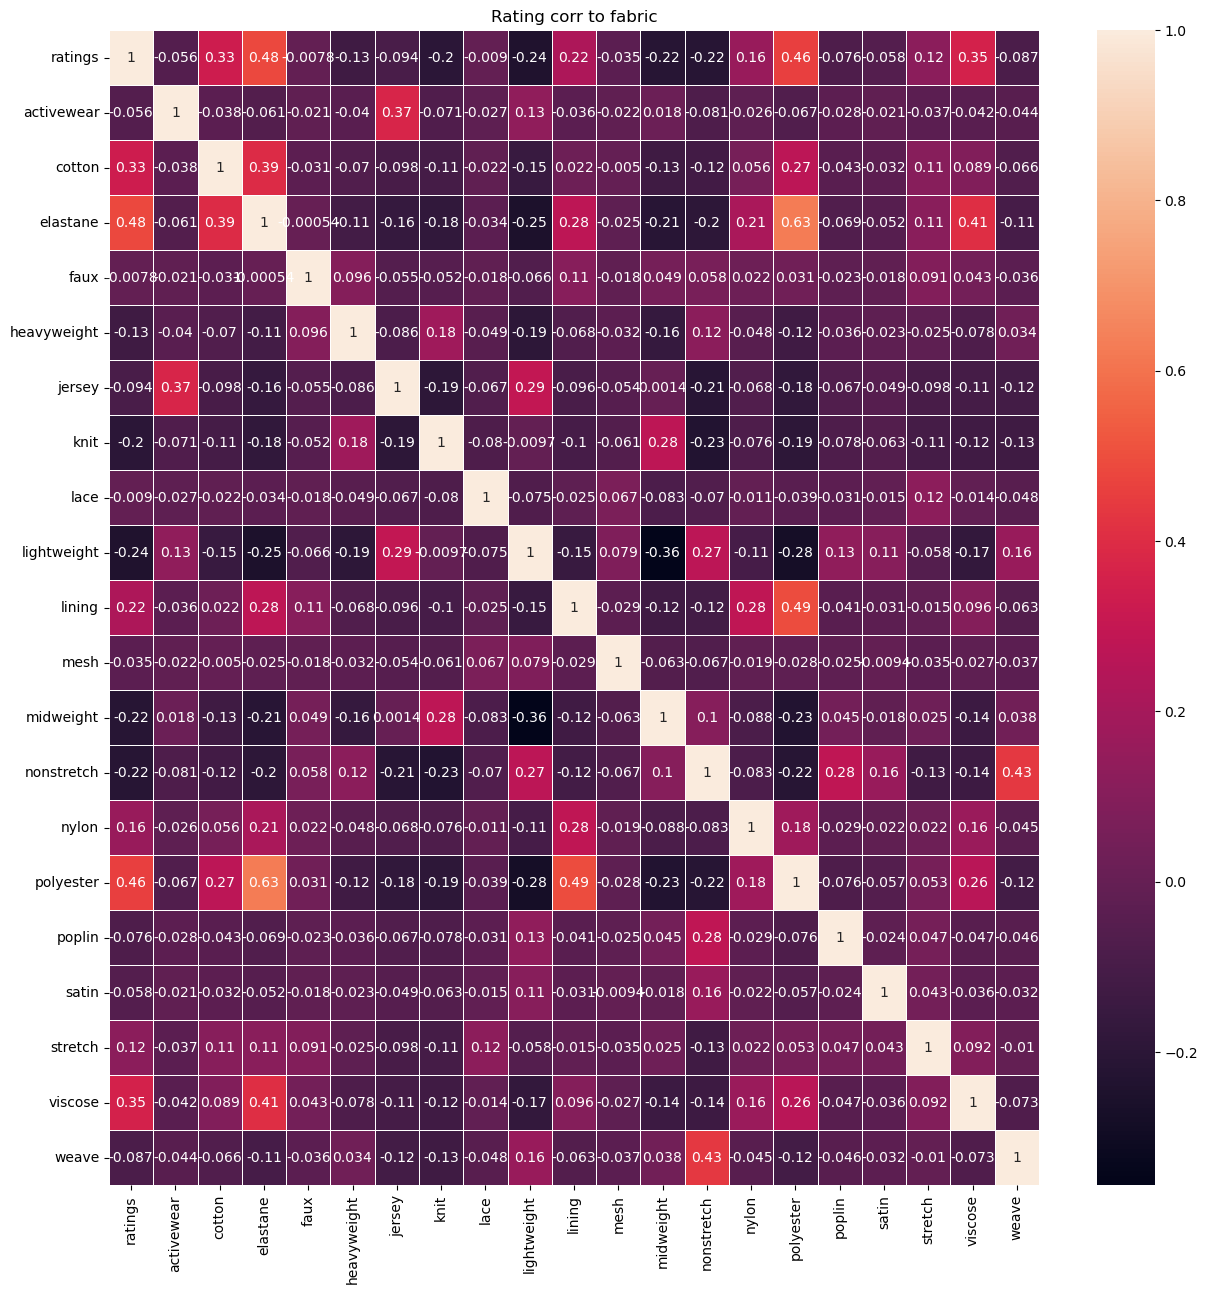

In [18]:
dataset_df1 = pd.DataFrame(df, columns =['ratings','activewear','cotton','elastane','faux','heavyweight','jersey','knit',
 'lace','lightweight','lining','mesh','midweight','nonstretch','nylon','polyester','poplin','satin','stretch','viscose','weave'])
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset_df1.corr(), annot=True, linewidths=.5, ax=ax)
ax.set_title("Rating corr to fabric")

In [22]:
raw_df=pd.read_csv("finale_df.csv")
raw_df

,Unnamed: 0,brand,product_names,prices,ids,ratings,fabrics,category,XXS,XS,...,Grey,White,Brown,Orange,Pink,Green,Purple,Red,Yellow,other_colors
0,0,shopbop,Lace Top,490.00,PACOO30471,0,"Lightweight, stretch lace",11,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,shopbop,Jupe Skirt,620.00,PACOO30468,0,"Lightweight, stretch floral lace",7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,shopbop,Wyatt Shirt,255.00,RAGBO46380,0,"Mid-weight, non-stretch denim",11,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,shopbop,Shelly Wide Leg Crepe Pants,475.00,RAGBO46413,0,Mid-weight stretch crepe,6,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,shopbop,Jylan Moto Jacket,1598.00,VBEAR32197,0,"Heavyweight, non-stretch leather",2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,11264,avenue,High Waist Swim Brief - black,24.00,208016BLACK,3,"Body: 83% Nylon, 17% Elastane. Lining: 77% Nyl...",10,0,0,...,0,0,0,0,0,0,0,0,0,0
11265,11265,avenue,Girlfriend Rip Jean Dark Wash - petite,9.99,207158PTDKWS,5,"57% Cotton, 21% Viscose, 20% Polyester, 2% Ela...",6,0,0,...,0,0,0,0,0,0,0,0,0,0
11266,11266,avenue,High Rise Jegging Mid Wash - petite,9.00,207172PTMDWS,3,"78% Cotton, 20% Polyester, 2% Elastane.",6,0,0,...,0,0,0,0,0,0,0,0,0,0
11267,11267,avenue,High Rise Jegging Dark Wash - petite,19.99,207172PTDKWS,3,"78% Cotton, 20% Polyester, 2% Elastane.",6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = raw_df['fabrics'].value_counts().to_dict()

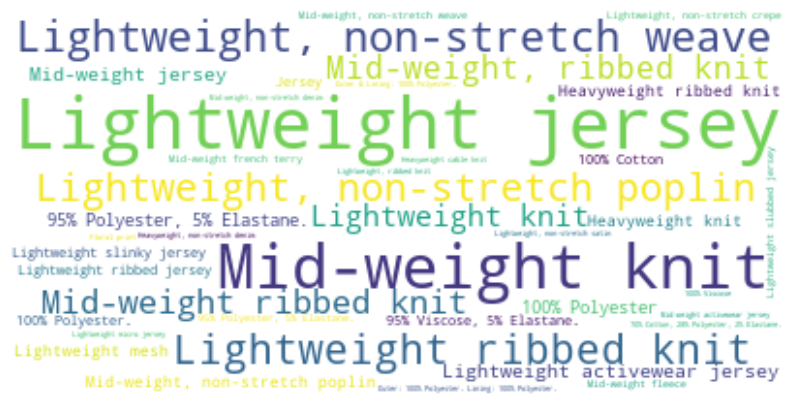

In [29]:
wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white").generate_from_frequencies(data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
from os import path
from PIL import Image

In [65]:
shirt_mask = np.array(Image.open("shirt_final_mask.png"))
shirt_mask

array([[[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       ...,

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255]],

       [[ 31

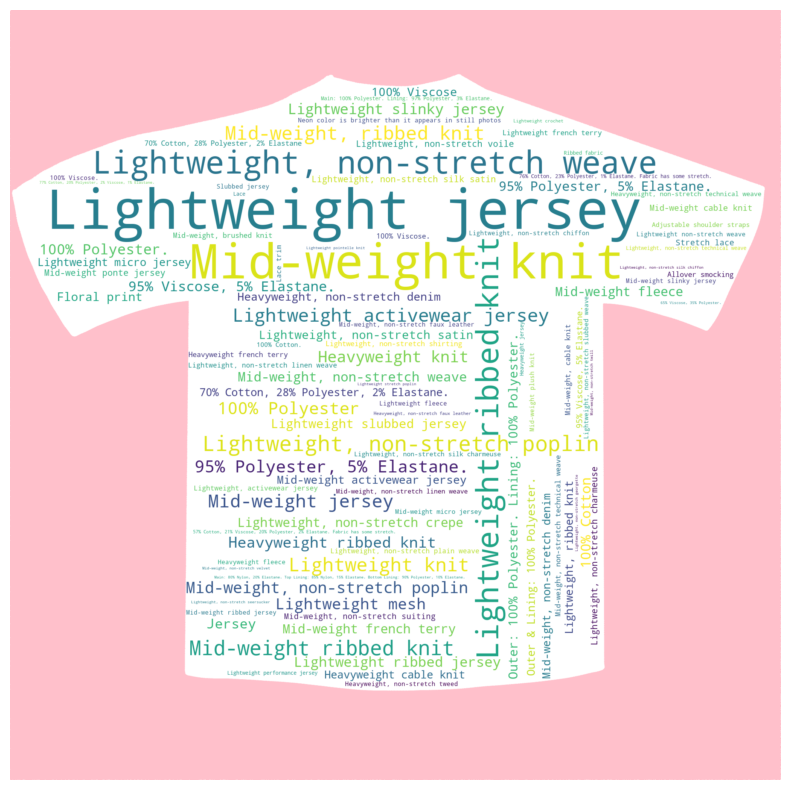

In [67]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

    
image_file=Image.open("shirt_final_mask.png")
image_file=image_file.convert('1')
shirt_mask = np.array(image_file)

transformed_shirt_mask = np.ndarray((shirt_mask.shape[0],shirt_mask.shape[1]), np.int32)

for i in range(len(shirt_mask)):
    transformed_shirt_mask[i] = list(map(transform_format, shirt_mask[i]))

wc = WordCloud(background_color="white", max_words=100, mask=transformed_shirt_mask,contour_width=3, contour_color='pink')

wc=wc.generate_from_frequencies(data)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()